In [ ]:
!pip install chess
!pip install pandas

**Download the data**

In [ ]:
!chmod +x /kaggle/input/bashfiles/download.sh
!source /kaggle/input/bashfiles/download.sh

In [ ]:
import pandas as pd
import numpy as np
import os

**Load Dataset**

In [ ]:
def load_n_datasets(n,foldername):
    all_datasets = []
    filenames = os.listdir(foldername)
    for i in range(n):
        filename = filenames[i]
        if filename.endswith('.csv'):
            dataset = pd.read_csv(os.path.join('processed_data', filename))
            all_datasets.append(dataset)
    combined_dataset = pd.concat(all_datasets, ignore_index=True)
    return combined_dataset

In [8]:
#chess_data = pd.read_csv('processed_data/processed_chessData_split1.csv')
chess_data = load_n_datasets(5,'processed_data')

X_chess_data =  chess_data["FEN"]
y_chess_data =  chess_data["Evaluation"].astype(int)

print(X_chess_data.shape)
print(y_chess_data.shape)

(4987357,)
(4987357,)


In [10]:
X_chess_data =  chess_data.iloc[:,0:-1]
y_chess_data =  chess_data.iloc[:,-1].astype(int)

In [7]:
print(X_chess_data.shape)
print(y_chess_data.shape)

(4983855, 69)

(4983855,)


**Downsampling the dataset**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X, _, y, _ = train_test_split(X_chess_data, y_chess_data, test_size=0.9, random_state=42)
X.shape

y = (y - y.min()) / (y.max()-y.min())

**Separating in training, validation and testing sets**

In [28]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

3574947    0.000000
4109703    0.007458
4583877    0.006956
507394     0.049265
1459756    0.003442
             ...   
1570006    0.037648
2234489    0.005880
4926484    0.037361
4304572    0.000359
1692743    0.013912
Name: Evaluation, Length: 498735, dtype: float64

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

tf.random.set_seed(101)


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[X_train.shape[1]])  # One dense layer with one unit for linear regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function

# Print model summary
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 1)                 70        

                                                                 


Total params: 70

Trainable params: 70

Non-trainable params: 0

_________________________________________________________________


2024-04-10 13:29:50.557846: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model on the test set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Test Mean Absolute Error:", mae)
print("Test Root Mean Squared Error:", rmse)


Epoch 1/20

20464/21805 [===========================>..] - ETA: 0s - loss: 545527.0000

KeyboardInterrupt: 

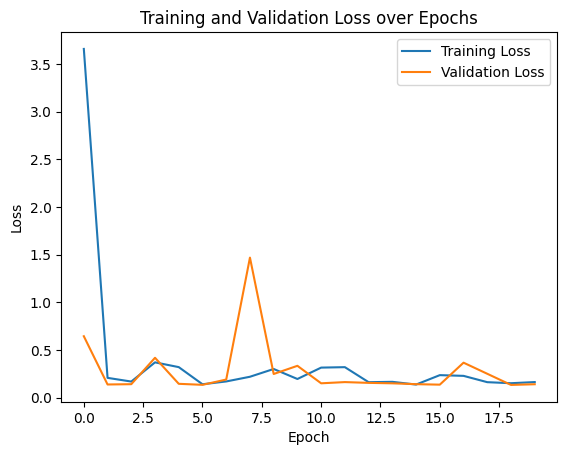

In [37]:
import matplotlib.pyplot as  plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add input layer
model.add(Dense(64, activation='linear', input_shape=[X_train.shape[1]]))  # Input shape is (8, 8, 14)

# Add two more dense layers with 64 neurons each
for _ in range(2):
    model.add(Dense(64, activation='linear'))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 1 neuron and linear activation for regression
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Display model summary
model.summary()


Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense_1 (Dense)             (None, 64)                4480      

                                                                 

 dense_2 (Dense)             (None, 64)                4160      

                                                                 

 dense_3 (Dense)             (None, 64)                4160      

                                                                 

 flatten (Flatten)           (None, 64)                0         

                                                                 

 dense_4 (Dense)             (None, 1)                 65        

                                                                 


Total params: 12,865

Trainable params: 12,865

Non-trainable params: 0

_________________________________________________________________


pontos a desenvolver: Criar uma mesa com bit map (só usar a mesa)  
                        criar 3 datasets  
                        randomized grid search  
                        regular exemplos (mesmo numero de exemplos para cada label) 
                        usar um dataset com exemplos complicados  
                        Usar CNN e MLP


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.regularizers import l2

num_hidden_units = 2048
num_layers = 3

batch_size = 256
input_shape = (X_train.shape[1],)  # Define your input shape here


model = Sequential()

l2_reg = 0.01

for i in range(num_layers):
    model.add(Dense(num_hidden_units, input_shape=input_shape, kernel_initializer=glorot_uniform(), kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))


model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2048)           │       143,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,562,689 (32.66 MB)

 Trainable params: 8,550,401 (32.62 MB)

 Non-trainable params: 12,288 (48.00 KB)

In [36]:
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size*4, validation_data=(X_val, y_val))

# Evaluate the model on the test set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Test Mean Absolute Error:", mae)
print("Test Root Mean Squared Error:", rmse)


Epoch 1/20
 16/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0458 - loss: 41.1270

W0000 00:00:1712762343.691265     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0729 - loss: 10.4842

W0000 00:00:1712762349.655850     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712762350.422244     100 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


390/390 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.0730 - loss: 10.4668 - val_accuracy: 0.0766 - val_loss: 0.6445
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0765 - loss: 0.2913 - val_accuracy: 0.0766 - val_loss: 0.1383
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0766 - loss: 0.1435 - val_accuracy: 0.0766 - val_loss: 0.1414
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0766 - loss: 0.1615 - val_accuracy: 0.0766 - val_loss: 0.4184
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0762 - loss: 0.6371 - val_accuracy: 0.0766 - val_loss: 0.1453
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0766 - loss: 0.1430 - val_accuracy: 0.0766 - val_loss: 0.1346
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0766 - loss: 0.1488 - val_accuracy: 0.0766 - val_loss: 0.1900
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0766 - loss: 0.1765 - val_accuracy: 0.0